In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Clone the YOLOv5 repository and install dependencies
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17045, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17045 (delta 10), reused 18 (delta 8), pack-reused 17022 (from 1)
Receiving objects: 100% (17045/17045), 15.66 MiB | 23.25 MiB/s, done.
Resolving deltas: 100% (11700/11700), done.
/kaggle/working/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 15.3 MB/s eta 0:00:00a 0:00:01


In [2]:
# Replace these with your dataset paths and class details
train_dir = '/kaggle/input/garbage3/train'
val_dir = '/kaggle/input/garbage3/valid'
number_of_classes = 6  # Replace with the actual number of classes
class_names = ['BIODEGRADABLE', 'CARDBOARD', 'GLASS', 'METAL', 'PAPER', 'PLASTIC']  # Replace with the list of your class names

# Create YAML configuration for YOLOv5
data_yaml = f"""
train: {train_dir}
val: {val_dir}

nc: {number_of_classes}
names: {class_names}
"""

# Write the YAML config to file
with open("custom_data.yaml", "w") as file:
    file.write(data_yaml)


In [3]:
!python train.py --img 640 --batch 32 --epochs 20 --data custom_data.yaml --weights yolov5s.pt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evo

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-11-14 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


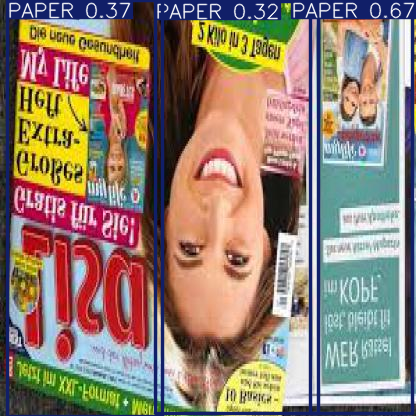

In [10]:
import torch
from IPython.display import display
from PIL import Image

# Load the trained model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/kaggle/working/yolov5/runs/train/exp/weights/best.pt', force_reload=True)

# Specify the path to the image you want to test
image_path = '/kaggle/input/garbage3/train/images/paper558_jpg.rf.d71125a37455e59200b13e8bddae3e92.jpg'  # Replace with the path to your image

# Run inference
results = model(image_path)

# Display the image with bounding boxes
results.show()  # This will display the image inline with bounding boxes drawn


In [11]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 50.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.7 MB/s eta 0:00:00:00:0100:01


In [12]:
!npm install localtunnel

m##################] \ reify:axios: http fetch GET 200 https://registry.npmjs.oistry.
added 22 packages in 2s

3 packages are looking for funding
  run `npm fund` for details
npm notice 
npm notice New minor version of npm available! 10.5.0 -> 10.9.0
npm notice Changelog: https://github.com/npm/cli/releases/tag/v10.9.0
npm notice Run npm install -g npm@10.9.0 to update!
npm notice 


In [13]:
%%writefile my_app.py
import streamlit as st
import torch
from PIL import Image

# Load the trained YOLOv5 model
@st.cache_resource
def load_model():
    model = torch.hub.load('ultralytics/yolov5', 'custom', path='/kaggle/working/yolov5/runs/train/exp/weights/best.pt', force_reload=True)
    return model

# Function to run inference on the image
def run_inference(image):
    # Run inference
    results = model(image)
    return results

# Streamlit UI
st.title("YOLOv5 Object Detection")
st.write("Upload an image to run object detection.")

# Upload image
uploaded_image = st.file_uploader("Choose an image", type=["jpg", "png", "jpeg"])

if uploaded_image is not None:
    # Open the uploaded image using PIL
    img = Image.open(uploaded_image)
    
    # Resize the image for the model (YOLOv5 expects a 640x640 input)
    img_resized = img.resize((640, 640))
    
    # Display the uploaded image
    st.image(img_resized, caption="Uploaded Image", use_column_width=True)
    
    # Run inference on the image
    model = load_model()
    results = run_inference(img_resized)
    
    # Display the image with bounding boxes
    st.image(results.render()[0], caption="Predicted Image", use_column_width=True)
    st.write(f"Detected {len(results.xywh[0])} objects")



Writing my_app.py


In [14]:
!curl ipv4.icanhazip.com

34.45.82.225


In [15]:
!streamlit run my_app.py &>./logs.txt & npx localtunnel --port 8501

your url is: https://tall-toes-wink.loca.lt
^C
